<a href="https://colab.research.google.com/github/cz101/ML-TF/blob/main/TF2_0_Autoregressive_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf 
print(tf.__version__)

2.8.2


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.layers import  Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

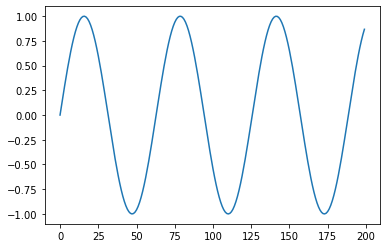

In [3]:
series = np.sin(0.1*np.arange(200))
plt.plot(series)
plt.show()

In [7]:
T=10
X= []
Y= []

for t in range (len(series)-T):
  x = series [t:t+T]
  X.append(x)
  y = series [t+T]
  Y.append(y)
X = np.array(X).reshape(-1,T)
Y = np.array(Y)
N = len(X)

print("X shape", X.shape, "Y shape", Y.shape)

X shape (190, 10) Y shape (190,)


In [9]:
#built the autogregressive liner model
i= Input(shape=(T,))
x= Dense(1)(i)
model = Model(i,x)
model.compile(
    loss = 'mse',
    optimizer= Adam(lr=0.1),
)
r= model.fit(
    X[: -N//2],Y[: -N//2],
    epochs=80,
    validation_data=(X[-N//2:],Y[-N//2:])
)

Epoch 1/80


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


3/3 [==============================] - 0s 59ms/step - loss: 0.7043 - val_loss: 0.1844
Epoch 2/80
3/3 [==============================] - 0s 12ms/step - loss: 0.4597 - val_loss: 0.3154
Epoch 3/80
3/3 [==============================] - 0s 10ms/step - loss: 0.1618 - val_loss: 0.0453
Epoch 4/80
3/3 [==============================] - 0s 12ms/step - loss: 0.1403 - val_loss: 0.1649
Epoch 5/80
3/3 [==============================] - 0s 12ms/step - loss: 0.1847 - val_loss: 0.0228
Epoch 6/80
3/3 [==============================] - 0s 12ms/step - loss: 0.0230 - val_loss: 0.0727
Epoch 7/80
3/3 [==============================] - 0s 12ms/step - loss: 0.0939 - val_loss: 0.0528
Epoch 8/80
3/3 [==============================] - 0s 11ms/step - loss: 0.0372 - val_loss: 0.0127
Epoch 9/80
3/3 [==============================] - 0s 12ms/step - loss: 0.0262 - val_loss: 0.0653
Epoch 10/80
3/3 [==============================] - 0s 12ms/step - loss: 0.0409 - val_loss: 0.0122
Epoch 11/80
3/3 [=======================

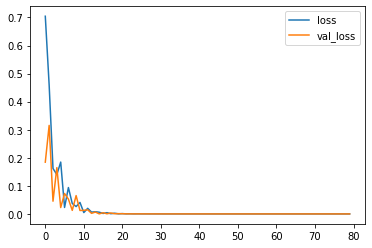

In [10]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()